###MODEL OF CNN

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import keras
%matplotlib inline
#import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from IPython.display import SVG, Image

img_size=48 #converting img into array size of 48
batch_size=32


#we have 3 sets of convolutions followed by pooling input shape is 48 by 48
#we will define a sequential layer
model = Sequential()
#32 filters with 3x3 matrix of pixels which generate dot product with the random 3x3 matrix, done for all 32 filters 
# Note the input shape is the desired size of the input image 128,1288 with 3 bytes color
model.add(Conv2D(32,kernel_size= (3, 3), activation='relu',input_shape=( 128, 128,3),padding='same'))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu',padding='same'))

model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))#reduce image size and overfitting
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu',padding='same'))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu',padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(3)) #because of 3 classes
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 64)        0

###25 Epochs

Found 18216 images belonging to 3 classes.
Found 14574 images belonging to 3 classes.
Found 3642 images belonging to 3 classes.
Epoch 1/25
456/456 [==============================] - 4180s 9s/step - loss: 48.4242 - accuracy: 0.5657 - val_loss: 0.9367 - val_accuracy: 0.5733
Epoch 2/25
456/456 [==============================] - 205s 449ms/step - loss: 0.9187 - accuracy: 0.5778 - val_loss: 0.9955 - val_accuracy: 0.5401
Epoch 3/25
456/456 [==============================] - 206s 452ms/step - loss: 0.8656 - accuracy: 0.6155 - val_loss: 1.0120 - val_accuracy: 0.5357
Epoch 4/25
456/456 [==============================] - 206s 451ms/step - loss: 0.8003 - accuracy: 0.6449 - val_loss: 0.8897 - val_accuracy: 0.5958
Epoch 5/25
456/456 [==============================] - 204s 448ms/step - loss: 0.6581 - accuracy: 0.7176 - val_loss: 0.5857 - val_accuracy: 0.7301
Epoch 6/25
456/456 [==============================] - 206s 451ms/step - loss: 0.3660 - accuracy: 0.8549 - val_loss: 0.5728 - val_accuracy: 0.81

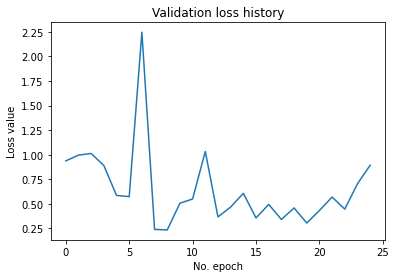

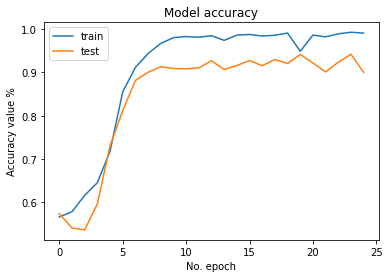

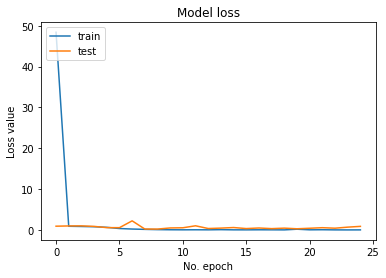

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
#import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import *
from IPython.display import SVG, Image
#from livelossplot import PlotLossesTensorFlowKeras
#from Keras import backend as K
#K.common.image_dim_ordering()
#K.common.set_image_dim_ordering(dim_ordering)


img_size=128
batch_size=32

datagen_train=ImageDataGenerator(horizontal_flip=True,height_shift_range=0.05, 
                                 width_shift_range=0.05, fill_mode='constant', 
                                  zoom_range=0.05,validation_split=0.2,cval =0.1,rotation_range=8)
train_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', shuffle=True )
train_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', shuffle=True,subset='training' )
#TEST
datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', subset='validation')
#filepath = "/content/drive/My Drive/MyCNN/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint]
history=model.fit(x=train_generator,epochs=25,verbose=1, validation_data=validation_generator)#,callbacks=callbacks_list
score = model.evaluate( validation_generator, verbose=1)
print('Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: val_Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()
"""
#Plot history: val_Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

#Plot history: loss
plt.plot(history.history['loss'])
plt.title('loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

#Plot history: Accuracy
plt.plot(history.history['accuracy'])
plt.title('accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()
"""
# Visualize history
#Plot history: for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy value %')
plt.xlabel('No. epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot history: for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



###Confusion Matrix 

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
#import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import *
from IPython.display import SVG, Image
img_size=128
batch_size=32

datagen_train=ImageDataGenerator()#horizontal_flip=True,height_shift_range=0.05, 
                                 #width_shift_range=0.05, fill_mode='constant', 
                                  #zoom_range=0.05,validation_split=0.2,cval =0.1,rotation_range=8)
train_generator=datagen_train.flow_from_directory("/content/drive/MyDrive/Dataset/Model Evaluate",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', shuffle=False )
test_steps_per_epoch = np.math.ceil(train_generator.samples / train_generator.batch_size)
predictions = model.predict(train_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

Found 262 images belonging to 3 classes.


In [ ]:
true_classes = train_generator.classes
class_labels = list(train_generator.class_indices.keys())  

                     precision    recall  f1-score   support

         Plank pose       0.27      0.34      0.30        83
Pose-ReverseWarrior       0.44      0.55      0.49        87
     Pose-Warrior 1       0.25      0.13      0.17        92

           accuracy                           0.34       262
          macro avg       0.32      0.34      0.32       262
       weighted avg       0.32      0.34      0.32       262

[[28 26 29]
 [32 48  7]
 [45 35 12]]


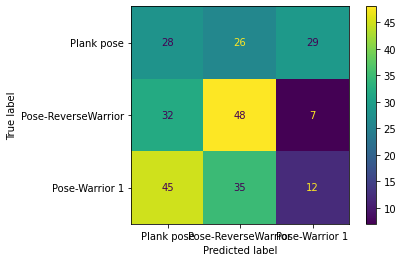

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 
cm=confusion_matrix(true_classes, predicted_classes)
#cm1=plot_confusion_matrix(true_classes,predicted_classes,class_labels,cmap=plt.cm.Blues)
print(cm)
cm_display = ConfusionMatrixDisplay(cm,class_labels).plot()
#print(cm1)

### 50 epochs

Found 18216 images belonging to 3 classes.
Found 14574 images belonging to 3 classes.
Found 3642 images belonging to 3 classes.
Epoch 1/50
456/456 [==============================] - 6507s 14s/step - loss: 41.7198 - accuracy: 0.6410 - val_loss: 0.7511 - val_accuracy: 0.6766
Epoch 2/50
456/456 [==============================] - 203s 445ms/step - loss: 0.4278 - accuracy: 0.8253 - val_loss: 0.9437 - val_accuracy: 0.8202
Epoch 3/50
456/456 [==============================] - 207s 454ms/step - loss: 0.1433 - accuracy: 0.9492 - val_loss: 1.1433 - val_accuracy: 0.8806
Epoch 4/50
456/456 [==============================] - 209s 459ms/step - loss: 0.0834 - accuracy: 0.9721 - val_loss: 0.5518 - val_accuracy: 0.8946
Epoch 5/50
456/456 [==============================] - 198s 435ms/step - loss: 0.0568 - accuracy: 0.9807 - val_loss: 1.0685 - val_accuracy: 0.9001
Epoch 6/50
456/456 [==============================] - 196s 429ms/step - loss: 0.0564 - accuracy: 0.9831 - val_loss: 0.8876 - val_accuracy: 0.9

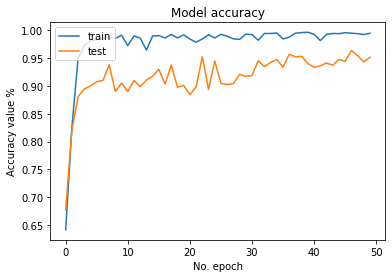

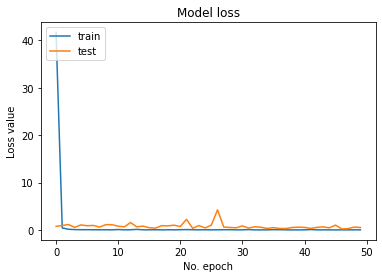

In [ ]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
#import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from IPython.display import SVG, Image
#from livelossplot import PlotLossesTensorFlowKeras
#from Keras import backend as K
#K.common.image_dim_ordering()
#K.common.set_image_dim_ordering(dim_ordering)


img_size=128
batch_size=32

datagen_train=ImageDataGenerator(horizontal_flip=True,height_shift_range=0.05, 
                                 width_shift_range=0.05, fill_mode='constant', 
                                  zoom_range=0.05,validation_split=0.2,cval =0.1,rotation_range=8)
train_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', shuffle=True )
train_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', shuffle=True,subset='training' )
#TEST
datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory("/content/drive/My Drive/Dataset/Augmented train ",target_size=(img_size,img_size), batch_size=batch_size,class_mode='categorical', subset='validation')

history=model.fit(x=train_generator,epochs=50,verbose=1, validation_data=validation_generator)
score = model.evaluate( validation_generator, verbose=1)
print('Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
#Plot history: for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy value %')
plt.xlabel('No. epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot history: for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
